In [2]:
%run ./Dissertation.ipynb

In this notebook I apply different methodologies used across the literature to model SCZ. I specifically look at how parameter changes in the neurobiological network influence the psychometric function - i.e., the values of the Central Point and the Slope. I also come up with my own exploration of cross-modal links and their influence on schizophrenia.

In [3]:
n = int(200/0.4)
a_distances = dist = [24, 39, 54, 75, 96, 111, 126]
T = 200

### 1) Exploring E/I Imbalance

The most reliable neurobiological marker of schizophrenia is reduced GABAergic inhibition intraregionally, which I model through either excessive $L_{ex}^s$ values

In [4]:
#Start by building the inflexible parameters

Wt, Wa, Wv, Bt, Ba, Bv = FwFb(6.5, 6.5, 6.5, 6.55, 6.55, 6.55, 17, 990, 49, 0.98) #feedforward and feedback
Wat, Wvt, Wav = crossmodal(1.3, 2, 1.3, 2, 1.3, 2)

In [5]:
LEXs = np.linspace(0.175, 1.25, 15) #anything larger bugs out, unless paired with weaker top-down connections as well

zt = np.zeros((len(LEXs), Mt,Nt,len(dist), n))
zv = np.zeros((len(LEXs), Mv,Nv,len(dist), n))
za = np.zeros((len(LEXs), Ma,Na,len(dist), n))
zm = np.zeros((len(LEXs), len(dist), n))

LRTs = np.zeros((len(LEXs), len(dist)))

for i in range(len(LEXs)):
    #For each L_ex see what happens
    Lt, La, Lv = Lw(LEXs[i], 0.05, 1, 4, LEXs[i], 0.05, 20, 80, LEXs[i], 0.05, 2, 8)
    zt[i,:,:,:,:], za[i,:,:,:,:], zm[i,:,:], zv[i,:,:,:,:], LRTs[i, :] = experiment(0.4, T, dist, 5, Lt, La, Lv, Wt, Wa, Wv, Bt, Ba, Bv, Wat, Wvt, Wav, 0, 0)

<ipython-input-2-f0752756f30b>:34: RuntimeWarning: overflow encountered in exp
  psim = (fmin_m + fmax_m * np.exp((qm - qc_m) * r_m)) / (1 + np.exp((qm - qc_m) * r_m))
<ipython-input-2-f0752756f30b>:34: RuntimeWarning: invalid value encountered in double_scalars
  psim = (fmin_m + fmax_m * np.exp((qm - qc_m) * r_m)) / (1 + np.exp((qm - qc_m) * r_m))
<ipython-input-2-4009c660ebeb>:94: RuntimeWarning: invalid value encountered in greater
  rt[i, j] = np.any(zt[:,:,i,j - 1] > (0.9))


In [6]:
Lcp = np.zeros(len(LEXs))
Lslope = np.zeros(len(LEXs))

for i in range(len(LEXs)):
  RTs = LRTs[i,:]

  ymin = np.min(RTs)
  ymax = np.max(RTs)

  Lcp[i], Lslope[i] = fitting(a_distances, RTs)  

np.save("Lcp.npy", Lcp)
np.save("Lslope.npy", Lslope)
np.save("LRT.npy", LRTs)

### 2)Exploring FW Pruning

Another straightforward method in the literature is synaptic pruning of feedforward weights from the unisensory regions into the multisensory neuron. 

In [7]:
Lt, La, Lv = Lw(0.15, 0.05, 1, 4, 0.15, 0.05, 20, 80, 0.15, 0.05, 2, 8)
Wt, Wa, Wv, Bt, Ba, Bv = FwFb(6.5, 6.5, 6.5, 6.55, 6.55, 6.55, 17, 990, 49, 0.98) #feedforward and feedback
Wat, Wvt, Wav = crossmodal(1.3, 2, 1.3, 2, 1.3, 2)

In [8]:
PRs = [0.75, 1, 1.25, 2.25, 4, 5, 6, 6.5]

percpr_a = np.zeros(len(PRs))
percpr_v = np.zeros(len(PRs))

for i in range(len(PRs)):
    wpruna = prun(Wa, PRs[i])
    wprunv = prun(Wv, PRs[i])
    percpr_a[i] = np.sum(wpruna) / np.sum(Wa)
    percpr_v[i] = np.sum(wprunv) / np.sum(Wv)

print(percpr_a, percpr_v)

[0.94919941 0.92910149 0.92910149 0.89514279 0.83624616 0.73246402
 0.73246402 0.73246402] [0.98359332 0.97340201 0.96021914 0.92044804 0.84184119 0.81042714
 0.75918771 0.744427  ]


In [9]:
zt = np.zeros((len(PRs), Mt,Nt,len(dist), n))
zv = np.zeros((len(PRs), Mv,Nv,len(dist), n))
za = np.zeros((len(PRs), Ma,Na,len(dist), n))
zm = np.zeros((len(PRs), len(dist), n))
PRRTs = np.zeros((len(PRs), len(dist)))

for i in range(len(PRs)):
    zt[i,:,:,:,:], za[i,:,:,:,:], zm[i,:,:], zv[i,:,:,:,:], PRRTs[i,:] = experiment(0.4, T, dist, 5, Lt, La, Lv, Wt, Wa, Wv, Bt, Ba, Bv, Wat, Wvt, Wav, PRs[i], 0)

In [10]:
PRcp = np.zeros(len(PRs))
PRslope = np.zeros(len(PRs))

for i in range(len(PRs)):
  RTs = PRRTs[i,:]

  ymin = np.min(RTs)
  ymax = np.max(RTs)

  PRcp[i], PRslope[i] = fitting(a_distances, RTs)  

np.save("PRcp.npy", PRcp)
np.save("PRslope.npy", PRslope)
np.save("PRRT.npy", PRRTs)

### 3)Exploring B_0

Paredes et al., 2021 further eplore top-down signalling issues, which they end up removing from their end model. Since my model includes crossmodal connectivity, this exploration could be of use

In [11]:
#Start by building the inflexible parameters

Wat, Wvt, Wav = crossmodal(1.3, 2, 1.3, 2, 1.3, 2) #cross-modal
Lt, La, Lv = Lw(0.15, 0.05, 1, 4, 0.15, 0.05, 20, 80, 0.15, 0.05, 2, 8) #lateral

In [13]:
FBs = np.linspace(6.55, 4.5, 15)
FBr = FBs / 6.55
zt = np.zeros((len(FBs), Mt, Nt, len(dist), n))
zv = np.zeros((len(FBs), Mv, Nv, len(dist), n))
za = np.zeros((len(FBs), Ma, Na, len(dist), n))
zm = np.zeros((len(FBs), len(dist), n))
BRTs = np.zeros((len(FBs), len(dist)))

for i in range(len(FBs)):
    Wt, Wa, Wv, Bt, Ba, Bv = FwFb(6.5, 6.5, 6.5, FBs[i], FBs[i], FBs[i], 17, 990, 49, 0.98) #feedforward and feedback
    zt[i,:,:,:,:], za[i,:,:,:,:], zm[i,:,:], zv[i,:,:,:,:], BRTs[i, :] = experiment(0.4, T, dist, 5, Lt, La, Lv, Wt, Wa, Wv, Bt, Ba, Bv, Wat, Wvt, Wav, 0, 0)

In [14]:
Bcp = np.zeros(len(FBs))
Bslope = np.zeros(len(FBs))

for i in range(len(FBs)):
  RTs = BRTs[i,:]

  ymin = np.min(RTs)
  ymax = np.max(RTs)

  Bcp[i], Bslope[i] = fitting(dist, RTs)  

np.save("Bcp.npy", Bcp)
np.save("Bslope.npy", Bslope)
np.save("BRT.npy", BRTs)

### 4)Exploring $\Phi_{cm}$

In [15]:
#Start by building the inflexible parameters

Wt, Wa, Wv, Bt, Ba, Bv = FwFb(6.5, 6.5, 6.5, 6.55, 6.55, 6.55, 17, 990, 49, 0.98) #feedforward and feedback
Lt, La, Lv = Lw(0.15, 0.05, 1, 4, 0.15, 0.05, 20, 80, 0.15, 0.05, 2, 8) #lateral

In [16]:
CMs = np.linspace(1.25, 0.125, 15)

In [17]:
zt = np.zeros((len(CMs), Mt,Nt,len(dist), n))
zv = np.zeros((len(CMs), Mv,Nv,len(dist), n))
za = np.zeros((len(CMs), Ma,Na,len(dist), n))
zm = np.zeros((len(CMs), len(dist), n))
CMRTs = np.zeros((len(CMs), len(dist)))

for i in range(len(CMs)):
    Wat, Wvt, Wav = crossmodal(CMs[i], 2, CMs[i], 2, CMs[i], 2) #cross-modal
    zt[i,:,:,:,:], za[i,:,:,:,:], zm[i,:,:], zv[i,:,:,:,:], CMRTs[i,:] = experiment(0.4, T, dist, 5, Lt, La, Lv, Wt, Wa, Wv, Bt, Ba, Bv, Wat, Wvt, Wav, 0, 0)

In [18]:
CMcp = np.zeros(len(CMs))
CMslope = np.zeros(len(CMs))

for i in range(len(CMs)):
  RTs = CMRTs[i,:]

  ymin = np.min(RTs)
  ymax = np.max(RTs)

  CMcp[i], CMslope[i] = fitting(a_distances, RTs)  

np.save("CMcp.npy", CMcp)
np.save("CMslope.npy", CMslope)
np.save("CMRT.npy", CMRTs)

### 5) Plots

In [19]:
#Alternatively, if you have the numpy objects and dont want to check for yourself
#FB = np.linspace(7.75, 4.5, 15)
#LEXs = np.linspace(0.175, 1.25, 15) / 0.15
#
#FBr = FB / 7.75 
#
#Lcp = np.load("./Lcp.npy")
#Lslope = np.load("./Lslope.npy")
#LRTs = np.load("./LRT.npy")
#
#Bcp = np.load("./Bcp.npy")
#Bslope = np.load("./Bslope.npy")
#BRTs = np.load("./BRT.npy")
#
#PRcp = np.load("./PRcp.npy")
#PRslope = np.load("./PRslope.npy")
#PRRTs = np.load("./PRRT.npy")

In [20]:
LEXs = np.linspace(0.175, 1.25, 15) / 0.15
FBr = np.linspace(6.55, 4.5, 15) / 7.75 

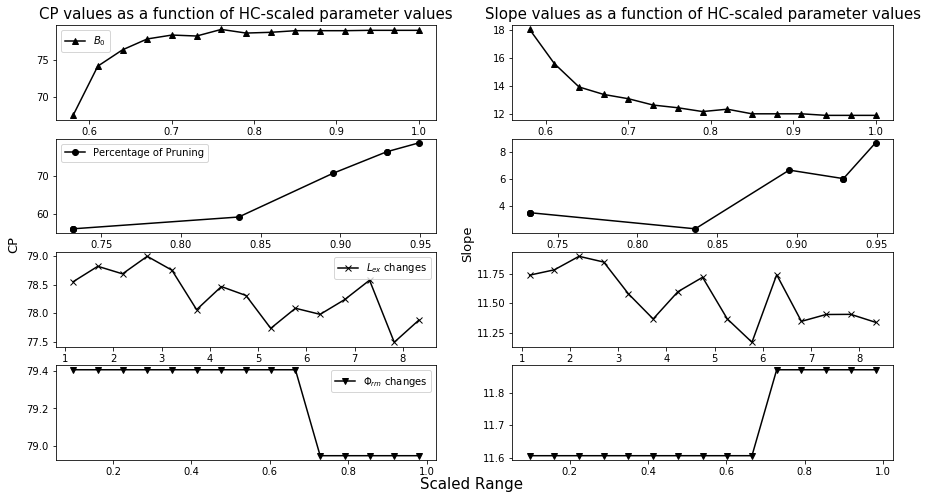

In [25]:
#Plot 2.18 

rate = percpr_a 
fig, ax = plt.subplots(4, 2, figsize = (15, 8))

ax[0,0].plot(FBr, Bcp, label = "$B_0$", color = "k", marker = "^")
ax[0,0].set_title("CP values as a function of HC-scaled parameter values", fontsize = 15)
ax[0,0].legend()

ax[0,1].plot(FBr, Bslope, label = "$B_0$", color = "k", marker = "^")

ax[0,1].set_title("Slope values as a function of HC-scaled parameter values", fontsize = 15)

ax[1,0].plot(rate, PRcp, label = "Percentage of Pruning", color = "k", marker = "o")
ax[1,0].legend()

ax[1,1].plot(rate, PRslope, color = "k", marker = "o")

ax[2,0].plot(LEXs, Lcp, label = "$L_{ex}$ changes", color = "k", marker = "x")
ax[2,0].legend()
ax[2,1].plot(LEXs, Lslope, color = "k", marker = "x")


ax[3,0].plot(CMs / 1.275, CMcp, label = "$\Phi_{rm}$ changes", color = "k", marker = "v")
ax[3,0].legend()
ax[3,1].plot(CMs / 1.275, CMslope, color = "k", marker = "v")
fig.text(0.51, 0.075, 'Scaled Range', ha='center', fontsize = 15)
fig.text(0.08, 0.5, 'CP', va='center', rotation='vertical', fontsize = 13)
fig.text(0.5, 0.5, 'Slope', va='center', rotation='vertical', fontsize = 13)

plt.show()